In [1]:
from ift6758.controller.nhl_data_downloader import NHLDataDownloader
downloader = NHLDataDownloader()

In [2]:
#range(2016, 2020) will download all seasons from 2016 to 2019
train_val_df = downloader.load_season_data(season_range=range(2016, 2020))
print(train_val_df.head())

Loaded regular season data from folder: 2016_CleanCSV
Loaded regular season data from folder: 2017_CleanCSV
Loaded regular season data from folder: 2018_CleanCSV
Loaded regular season data from folder: 2019_CleanCSV
Combined regular season data for seasons [2016, 2017, 2018, 2019].
      game_id   game_date  home_team_id  period time_in_period  event_id  \
0  2016020374  2016-12-04            16       1          00:37        56   
1  2016020374  2016-12-04            16       1          03:55        65   
2  2016020374  2016-12-04            16       1          04:47        68   
3  2016020374  2016-12-04            16       1          05:56        71   
4  2016020374  2016-12-04            16       1          07:50        76   

     event_type  is_goal shot_type  x_coord  ...   team_name  team_type  \
0  shot-on-goal    False  backhand     69.0  ...        Jets       away   
1  shot-on-goal    False      slap    -44.0  ...  Blackhawks       home   
2  shot-on-goal    False     wrist 

Filtering data...
Preparing data...
Preparing data with features: ['distance_to_net']...
Data prepared:
 - Training samples: 244480
 - Validation samples: 61120
Training model...
Evaluating model...
Validation Accuracy: 0.91

Plotting confusion matrix...


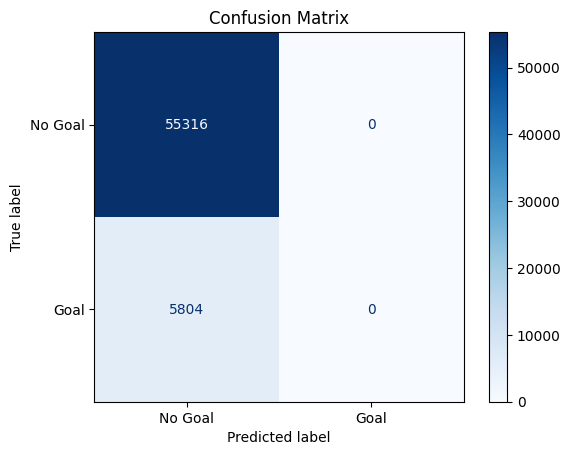

In [3]:

from ift6758.controller.logistic_model_analyzer import LogisticModelAnalyzer
analyzer = LogisticModelAnalyzer(train_val_df)
analyzer.run_analysis(features=["distance_to_net"])


Filtering data...
Preparing data...
Preparing data with features: ['distance_to_net']...
Data prepared:
 - Training samples: 244480
 - Validation samples: 61120
Applying SMOTE to oversample minority class...
SMOTE applied. Training data balanced: 442528 samples.
Training model...
Evaluating model...
Validation Accuracy: 0.59

Plotting confusion matrix...


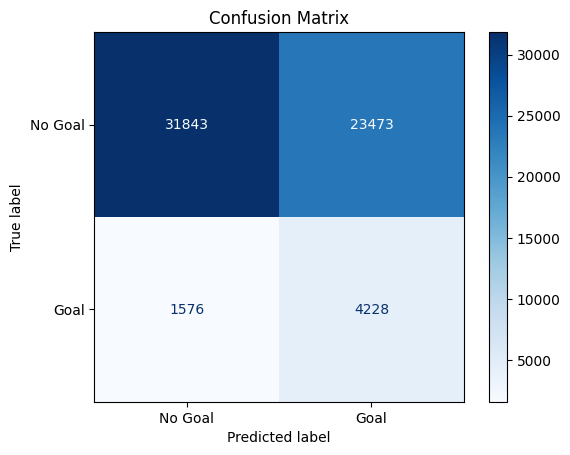

In [4]:
analyzer.run_analysis(features=["distance_to_net"],apply_smote=True)

Training Distance Only model...
Preparing data with features: ['distance_to_net']...
Data prepared:
 - Training samples: 244480
 - Validation samples: 61120
Training Angle Only model...
Preparing data with features: ['angle_to_net']...
Data prepared:
 - Training samples: 244480
 - Validation samples: 61120
Training Distance and Angle model...
Preparing data with features: ['distance_to_net', 'angle_to_net']...
Data prepared:
 - Training samples: 244480
 - Validation samples: 61120
Generating random probabilities for Random Baseline...


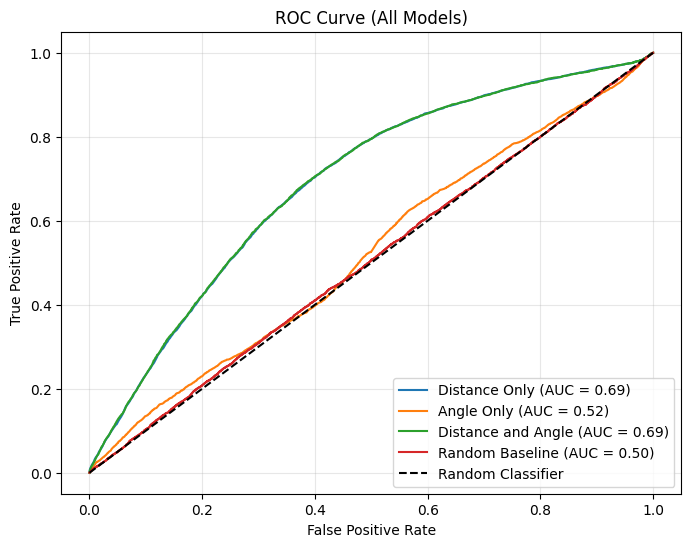

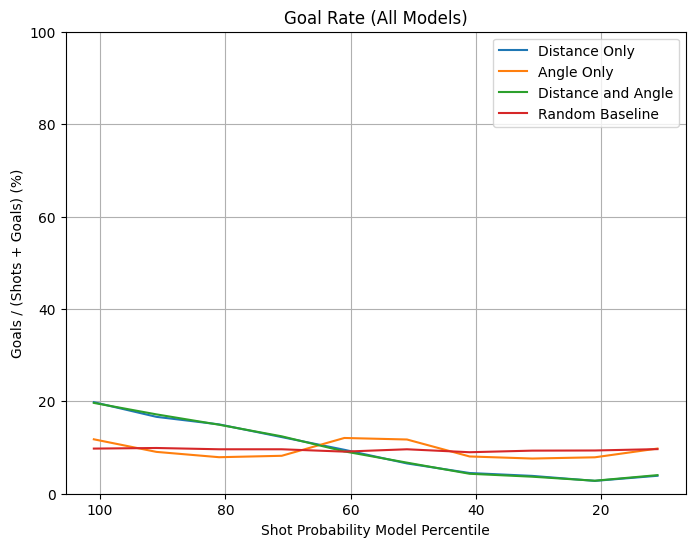

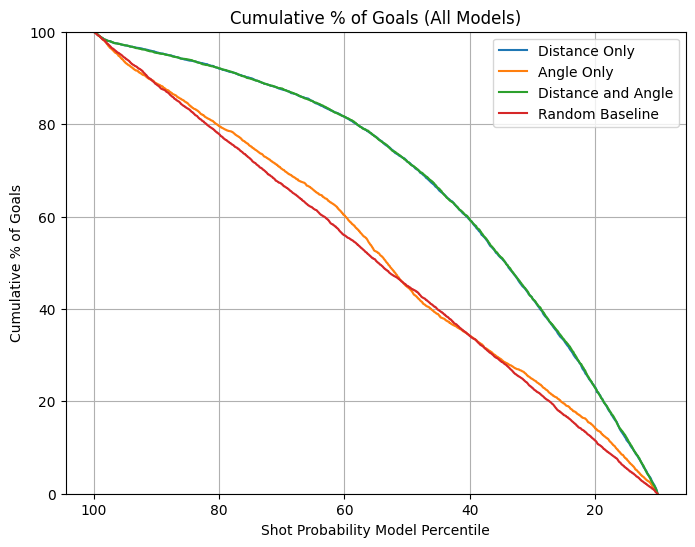

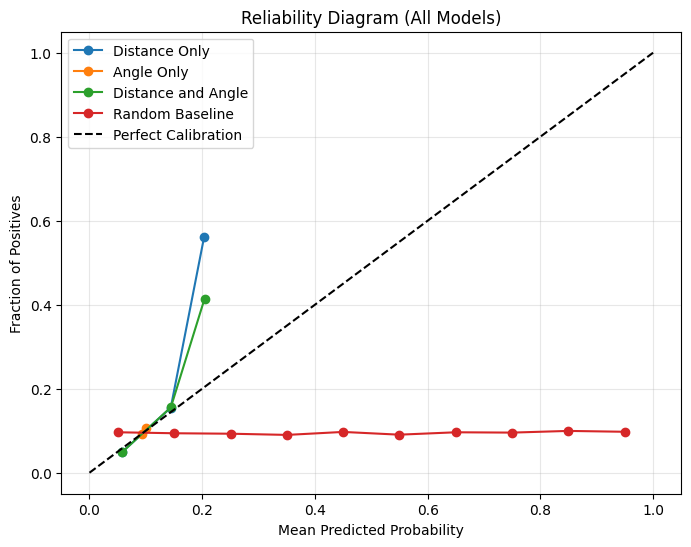

In [5]:
analyzer.evaluate_multiple_models()
